# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #lower range, upper range, how many numbers
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) #equal likely change to chose the same numbers. uniform distribution
lat_lngs = zip(lats, lngs) #puts it into pair like "zipper" them together, taking two lists and putting into one list

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"
city_url = url + "&q=" + cities[0] 

city_weather = requests.get(city_url).json()


city_weather

{'coord': {'lon': -176.5597, 'lat': -43.9535},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 53.82,
  'feels_like': 53.51,
  'temp_min': 53.82,
  'temp_max': 53.82,
  'pressure': 1001,
  'humidity': 98},
 'visibility': 5593,
 'wind': {'speed': 4, 'deg': 98, 'gust': 15.99},
 'rain': {'1h': 0.91},
 'clouds': {'all': 100},
 'dt': 1690226994,
 'sys': {'type': 2,
  'id': 2040615,
  'country': 'NZ',
  'sunrise': 1690312068,
  'sunset': 1690346245},
 'timezone': 45900,
 'id': 4032804,
 'name': 'Waitangi',
 'cod': 200}

In [4]:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = city_weather["coord"]["lat"]
city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"
#make sure to put api key {} so it knows to bring it in and the f at the beginning

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | saint-joseph
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | gadzhiyevo
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | ivdel'
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | b

City not found. Skipping...
Processing Record 39 of Set 4 | boise
Processing Record 40 of Set 4 | illizi
Processing Record 41 of Set 4 | miracema do tocantins
Processing Record 42 of Set 4 | kiunga
Processing Record 43 of Set 4 | walvis bay
Processing Record 44 of Set 4 | onega
Processing Record 45 of Set 4 | sao felix do xingu
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | hadibu
Processing Record 48 of Set 4 | mountain home
Processing Record 49 of Set 4 | salekhard
Processing Record 0 of Set 5 | barrie
Processing Record 1 of Set 5 | broome
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | smithers
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | ambon
Processing Record 6 of Set 5 | tomatlan
Processing Record 7 of Set 5 | north las vegas
Processing Record 8 of Set 5 | sonqor
Processing Record 9 of Set 5 | sisimiut
Processing Record 10 of Set 5 | reggane
Processing Record 11 of Set 5 | el fasher
Processing Record 12 

Processing Record 25 of Set 8 | darovskoy
Processing Record 26 of Set 8 | kuloy
Processing Record 27 of Set 8 | novyy urengoy
Processing Record 28 of Set 8 | ronne
Processing Record 29 of Set 8 | benjamin aceval
Processing Record 30 of Set 8 | maridi
Processing Record 31 of Set 8 | sao jose da coroa grande
Processing Record 32 of Set 8 | ouellah
City not found. Skipping...
Processing Record 33 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 34 of Set 8 | chutove
Processing Record 35 of Set 8 | polyarnyy
Processing Record 36 of Set 8 | naze
Processing Record 37 of Set 8 | takoradi
Processing Record 38 of Set 8 | afaahiti
Processing Record 39 of Set 8 | salalah
Processing Record 40 of Set 8 | beidao
Processing Record 41 of Set 8 | sovetskaya gavan'
Processing Record 42 of Set 8 | kapa'a
Processing Record 43 of Set 8 | carutapera
Processing Record 44 of Set 8 | siwa oasis
Processing Record 45 of Set 8 | essaouira
Processing Record 46 of Set 8 | kabansk
Processing Record 4

Processing Record 13 of Set 12 | lata
Processing Record 14 of Set 12 | lospalos
Processing Record 15 of Set 12 | leh
Processing Record 16 of Set 12 | baiyin
Processing Record 17 of Set 12 | bubaque
Processing Record 18 of Set 12 | new shagunnu
Processing Record 19 of Set 12 | arkalyk
Processing Record 20 of Set 12 | abepura
Processing Record 21 of Set 12 | acatlan de osorio
Processing Record 22 of Set 12 | kolonia town
Processing Record 23 of Set 12 | bedele
Processing Record 24 of Set 12 | libreville
Processing Record 25 of Set 12 | muisne
Processing Record 26 of Set 12 | toga village
City not found. Skipping...
Processing Record 27 of Set 12 | pangai
Processing Record 28 of Set 12 | alpena
Processing Record 29 of Set 12 | howard springs
Processing Record 30 of Set 12 | saint-jean-de-maurienne
Processing Record 31 of Set 12 | bayanhongor
Processing Record 32 of Set 12 | maryville
Processing Record 33 of Set 12 | keflavik
Processing Record 34 of Set 12 | vernon
Processing Record 35 of 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,53.82,98,100,4.00,NZ,1690226994
1,adamstown,-25.0660,-130.1015,67.93,68,29,9.42,PN,1690226995
2,saint-joseph,-21.3667,55.6167,66.58,83,39,7.05,RE,1690226693
3,carnarvon,-24.8667,113.6333,60.48,76,4,10.89,AU,1690226996
4,hermanus,-34.4187,19.2345,51.93,66,0,5.99,ZA,1690226997


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,53.82,98,100,4.00,NZ,1690226994
1,adamstown,-25.0660,-130.1015,67.93,68,29,9.42,PN,1690226995
2,saint-joseph,-21.3667,55.6167,66.58,83,39,7.05,RE,1690226693
3,carnarvon,-24.8667,113.6333,60.48,76,4,10.89,AU,1690226996
4,hermanus,-34.4187,19.2345,51.93,66,0,5.99,ZA,1690226997


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

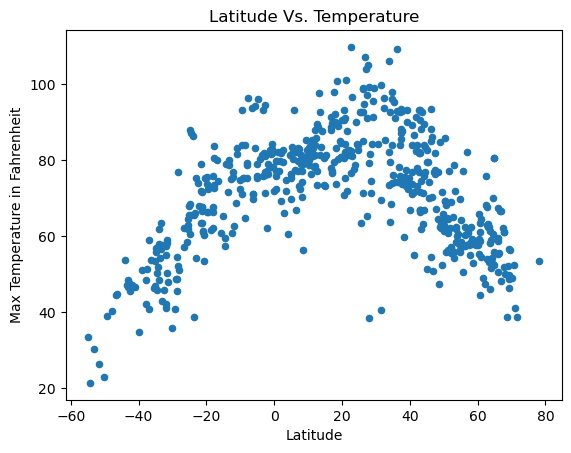

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = "Lat", y = "Max Temp")

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Fahrenheit")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

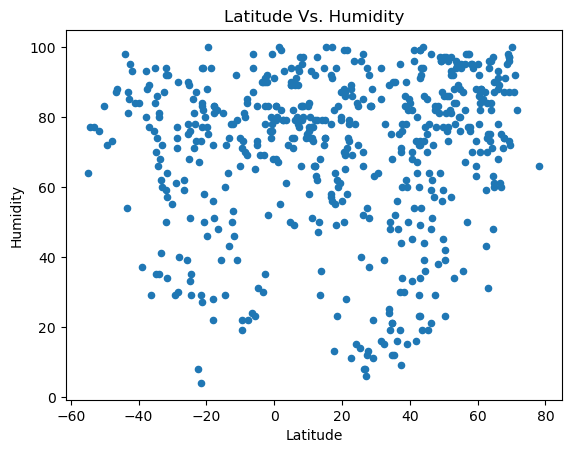

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = "Lat", y = "Humidity")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

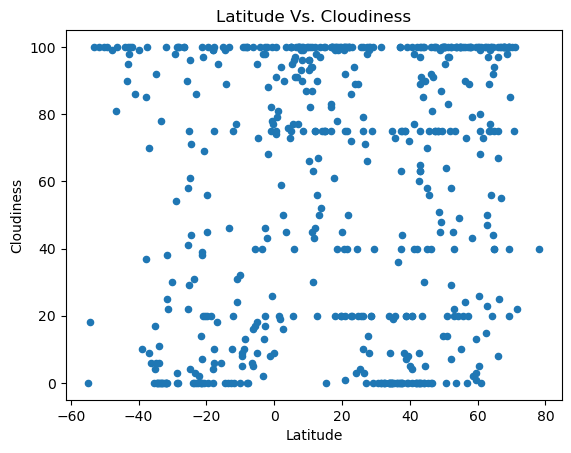

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = "Lat", y = "Cloudiness")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

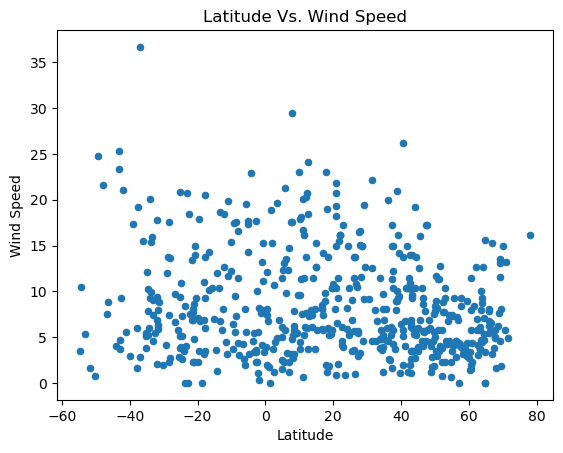

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = "Lat", y = "Wind Speed")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def regression (x_values, y_values, annotate, ylabel, title): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress,"r-")
    plt.annotate(line_eq, annotate, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    correlation = pearsonr(x_values, y_values) #directly imported on cell 1 so does not need st. 
    print(f"{correlation}.")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()
northern_hemi_df.count()

City          390
Lat           390
Lng           390
Max Temp      390
Humidity      390
Cloudiness    390
Wind Speed    390
Country       390
Date          390
dtype: int64

In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()
southern_hemi_df.count()

City          169
Lat           169
Lng           169
Max Temp      169
Humidity      169
Cloudiness    169
Wind Speed    169
Country       163
Date          169
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

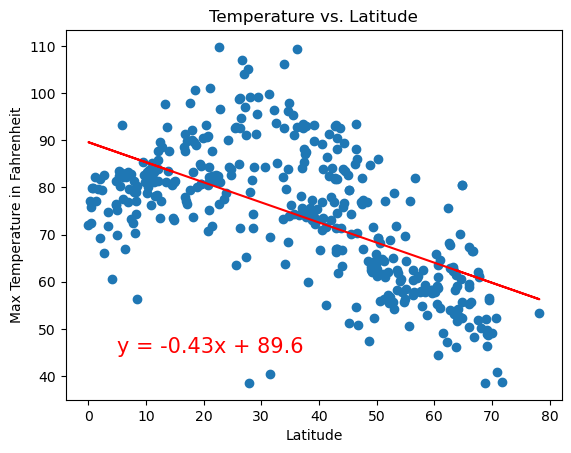

PearsonRResult(statistic=-0.6063349240072424, pvalue=1.619783413067912e-40).


In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
annotate = (5,45)
ylabel = "Max Temperature in Fahrenheit"
title = "Temperature vs. Latitude"
regression (x_values, y_values, annotate, ylabel, title)

# statistic close to -1 inverse relationship is fairly strong
# pvalue is telling you how likely is it random chance, you want lower than 0.05 then small chances. this is way less than that so 
# the chances are likely correlated and not random

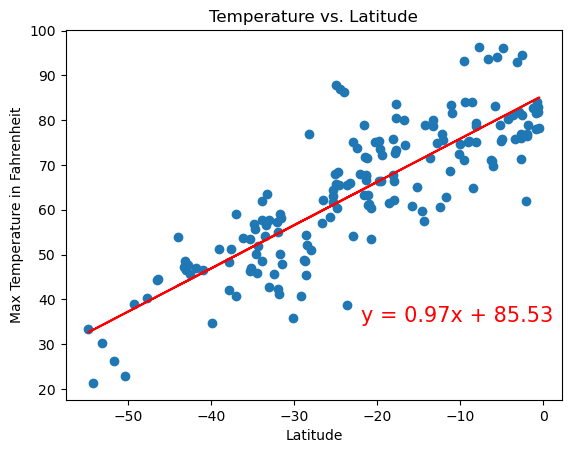

PearsonRResult(statistic=0.8408209498746024, pvalue=2.239273286785007e-46).


In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
annotate = (-22, 35)
ylabel = "Max Temperature in Fahrenheit"
title = "Temperature vs. Latitude"
regression (x_values, y_values, annotate, ylabel, title)

**Discussion about the linear relationship:** There is a strong correlation between the distance to the equator and maximum tempoerature. This means the higher the temperature, the closer to the equator. The p value also indicates this correlation is not by random chance.  

### Humidity vs. Latitude Linear Regression Plot

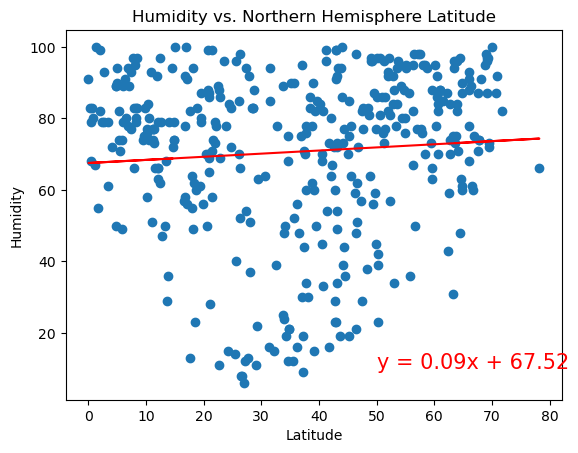

PearsonRResult(statistic=0.07594520105100376, pvalue=0.13435520232478698).


In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
annotate = (50,10)
ylabel = "Humidity"
title = "Humidity vs. Northern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

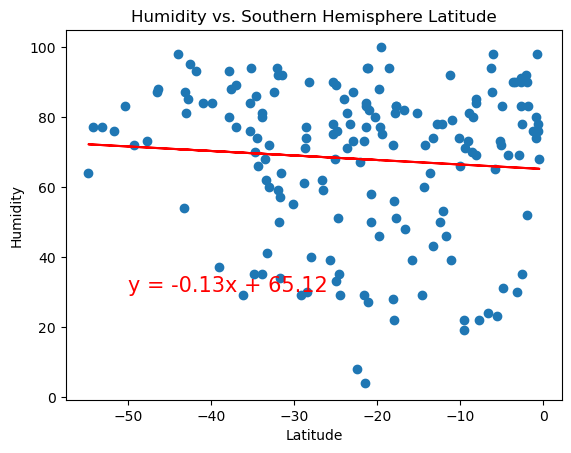

PearsonRResult(statistic=-0.08072823296847213, pvalue=0.2967713311250703).


In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
annotate = (-50,30)
ylabel = "Humidity"
title = "Humidity vs. Southern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

**Discussion about the linear relationship:** There is a weak negative correlation between humidity and latitude for both, nothern and southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

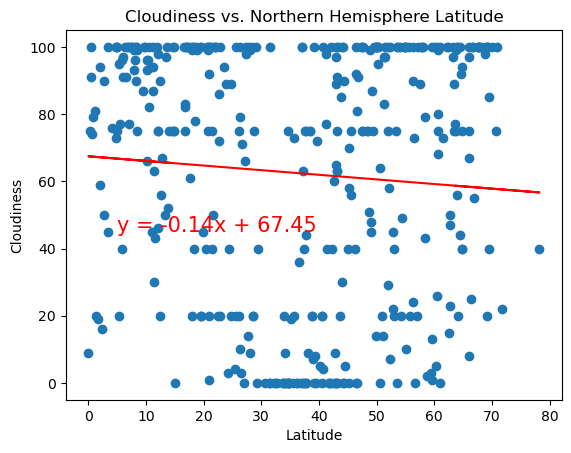

PearsonRResult(statistic=-0.07353094500298675, pvalue=0.14721993438275668).


In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
annotate = (5,45)
ylabel = "Cloudiness"
title = "Cloudiness vs. Northern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

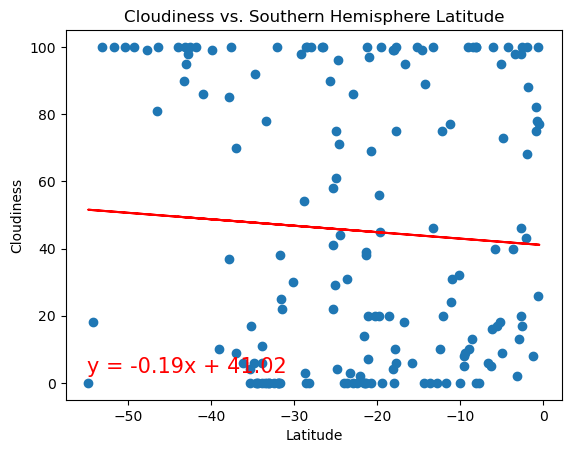

PearsonRResult(statistic=-0.06414131294004383, pvalue=0.4073862005696902).


In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
annotate = (-55, 3)
ylabel = "Cloudiness"
title = "Cloudiness vs. Southern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

**Discussion about the linear relationship:** There is not a significant correlation regarding cloudiness and latitude for either southern or nothern hemisphere. However, it would be interesting to see the cloudiness and the longitude correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

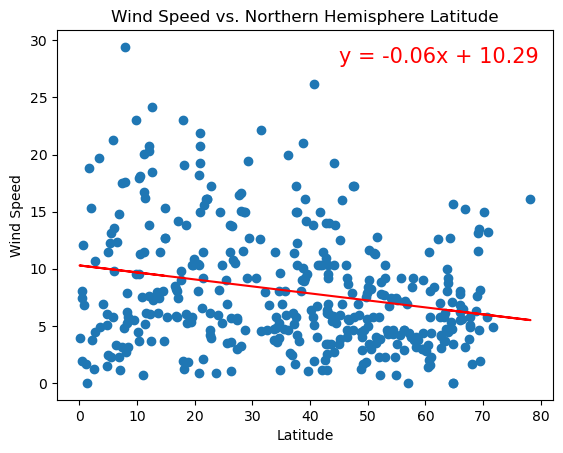

PearsonRResult(statistic=-0.233254862536954, pvalue=3.223986491830572e-06).


In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
annotate = (45,28)
ylabel = "Wind Speed"
title = "Wind Speed vs. Northern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

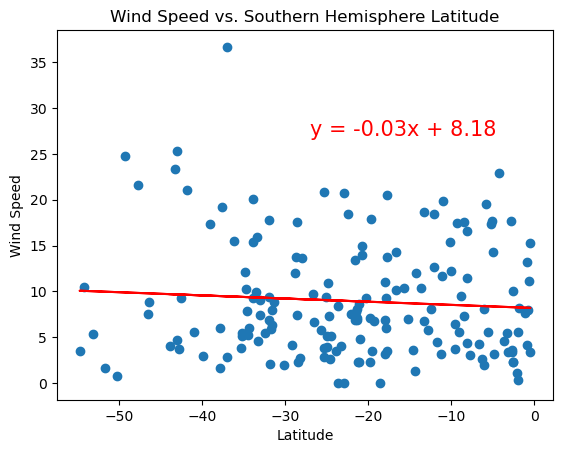

PearsonRResult(statistic=-0.07472186405976443, pvalue=0.33428170131727497).


In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
annotate = (-27,27)
ylabel = "Wind Speed"
title = "Wind Speed vs. Southern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

**Discussion about the linear relationship:** There is a weak, negative correlation between wind speed and latitude for both, southern and nothern hemispheres. 